In [99]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
# This is the 2019 AIRBNB data for the NY city downloaded from Kaggle. Price for some of the records is for single night and -
# for some it's total price for the minimum_nights listed. To avoid Price inconsistency, I considered only the records -
# with minimum_nights = 1 and split them by price to create three separate dataframes. To analyze Quantitative and Categorical -
# variables and to simulate nonparametric inference of Median I used one of the three dataframes, AB200, with has maximum -
# records. I wanted to explore nonparametric distribution and frequency distribution of price, and comparison of listings by -
# neighborhood

In [101]:
# 2019 AIRBNB data for NY city
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
ABNYC2019 = pd.read_csv("AB_NYC2019.csv")
ABNYC2019.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [102]:
# Split the original data based on price and minimum nights
AB200 = ABNYC2019[(ABNYC2019.minimum_nights == 1) & (ABNYC2019.price <= 200)]
AB500 = ABNYC2019[(ABNYC2019.minimum_nights == 1) & ((ABNYC2019.price > 200) & (ABNYC2019.price <= 500))]
ABmax = ABNYC2019[(ABNYC2019.minimum_nights == 1) & (ABNYC2019.price > 500)]

In [103]:
print(AB200.shape)
print(AB500.shape)
print(ABmax.shape)

(11138, 16)
(1303, 16)
(279, 16)


In [104]:
ABmax.price.max()

8000

Text(0, 0.5, 'Frequency')

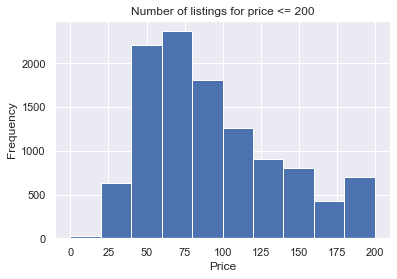

In [105]:
# Histograms for the quantitative variable "price"
plt.hist(AB200.price)
plt.title("Number of listings for price <= 200")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

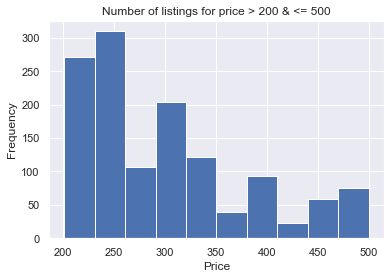

In [106]:
plt.hist(AB500.price)
plt.title("Number of listings for price > 200 & <= 500")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

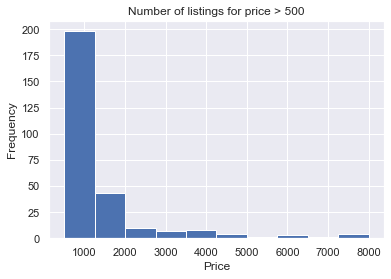

In [107]:
plt.hist(ABmax.price)
plt.title("Number of listings for price > 500")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

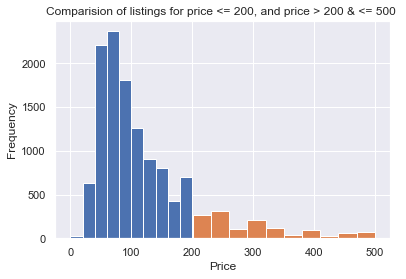

In [108]:
plt.hist(AB200.price)
plt.hist(AB500.price)
plt.title("Comparision of listings for price <= 200, and price > 200 & <= 500 ")
plt.xlabel("Price")
plt.ylabel("Frequency")

In [109]:
# Take 10% of AB200 as random sample and repeat the sample 10 times
idx = np.random.choice(AB200.shape[0], 1000)


In [110]:
idx

array([ 7424,  3433,  3210,  5759,    17,  8374,  6362,   938,  9275,
       10037,  3630, 11131,  1114, 10316,  2771,   477, 11070,   334,
        3623,  5993,  8277,   480,  8199,  1855,  5532,   539,  8877,
        5680,  6290,  3536,  3716,  6411,  9079,  6066,  2736,  2831,
         439,  6776,  2523,   627,  3523, 11005,  4858,  8106,   739,
        8121,  4538,  3298,  6566,  9945,  4860,  5784,  8303,  2861,
        1871,  4512,  9607,  2349,   304,  6315,  7000,  4219,  7776,
       10778,  8188,  1271, 10724,  7712,   940,  6377,  5996,  9607,
        3182,  1849,  7516,  6949,  6064,  6330,  9717,  1275,  4807,
        6286,  4504, 10893,  4446,  3590,   615,  5959,  6717,  1481,
        5236,  7424,  7308,  5733,  2002,  2789,  1671,  1105,  9815,
        3555,   962,  4100,  2863,  2820,  2757,  7439,  1828,  2439,
        9583,  1361,  1140,  3142,  1028,  7103,  9537, 10133,  5495,
         811,   473,  8647, 10378,   536, 11082,  6790,  5269,  8537,
       10505,  8607,

In [111]:
AB200_sample = AB200.iloc[idx, :]

In [112]:
AB200_sample.shape

(1000, 16)

In [113]:
# Population median for AB200
AB200.price.median()

80.0

In [114]:
# Sample median for 10% of the random records chosen
AB200_sample.price.median()

80.0

In [115]:
# Repeat the random sample 10 times and calculate medians each time for non-parametric inference of the medians 
boot_sample_medians = []
for i in range(10000):
                boot_AB200sample = np.random.choice(AB200_sample.price, 1000)
                boot_sample_medians.append(np.median(boot_AB200sample))       


In [116]:
# Calculate median of medians 
np.median(boot_sample_medians)

80.0

In [117]:
len(boot_sample_medians)

10000

In [118]:
# Confidence interval for bootstrap medians
confi_interval = np.percentile(boot_sample_medians, [2.5, 97.5]) # The middle 95% interval
confi_interval

array([79., 85.])

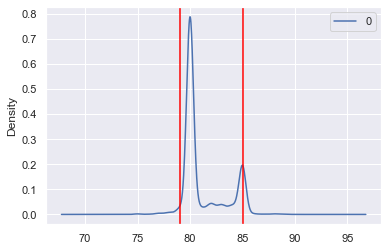

In [119]:
# Show the confidence interval on the density plot. Clearly population median, 80, is within confidence interval of bootstrap -
# medians of random samples. 
pd.DataFrame(boot_sample_medians).plot(kind='density')
for endpoint in confi_interval:
    plt.axvline(endpoint, color='red')


In [120]:
import seaborn as sns
sns.set()

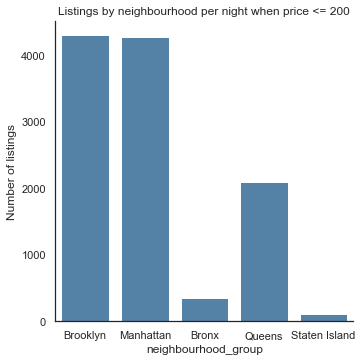

In [121]:
# Bar plots for the categorical variable "neighbourhood_group"
with sns.axes_style('white'):
    g = sns.factorplot("neighbourhood_group", data=AB200, aspect=1,
                       kind="count", color='steelblue')
    plt.title("Listings by neighbourhood per night when price <= 200")
    g.set_ylabels("Number of listings")

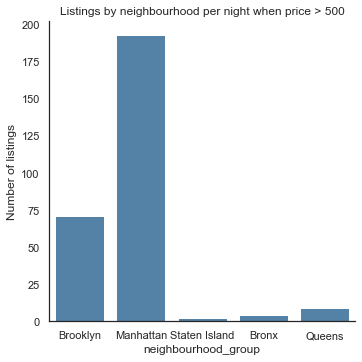

In [122]:
with sns.axes_style('white'):
    g = sns.factorplot("neighbourhood_group", data=ABmax, aspect=1,
                       kind="count", color='steelblue')
    plt.title("Listings by neighbourhood per night when price > 500")
    g.set_ylabels("Number of listings")